In [75]:
with open('text.txt','r',encoding='utf-8') as file:
    full_text = file.read()

In [76]:
import yake
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(full_text)
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  Intel Core : score 6.393055650799978e-05
Keyphrase:  Laptop Intel Core : score 9.100024969902554e-05
Keyphrase:  Hard Drive : score 0.00011118134927182542
Keyphrase:  Home Laptop silver : score 0.00014475082402493463
Keyphrase:  Refurbished Dell XPS : score 0.0001593508229737056
Keyphrase:  Solid State Drive : score 0.0002898391268728886
Keyphrase:  Laptop : score 0.00042278762870803115
Keyphrase:  Refurbished Dell : score 0.0004524288995805393
Keyphrase:  Intel : score 0.00045559555804855977
Keyphrase:  Windows : score 0.00045918141928945723


In [77]:
from multi_rake import Rake
rake = Rake()
keywords = rake.apply(full_text)
print(keywords[:10])

[('mcafee security protectio', 9.0), ('amd quad-core a12-9720p', 9.0), ('microsoft surface book', 9.0), ('mmgf2 newest version', 9.0), ('amd a10-9620p qc', 9.0), ('2tb hard drive', 8.972972972972972), ('750gb hard drive', 8.972972972972972), ('640gb hard drive', 8.972972972972972), ('500gb hard drive', 8.931306306306308), ('1tb hard drive', 8.797972972972973)]


In [78]:
from summa import keywords
TR_keywords = keywords.keywords(full_text, scores=True)
print(TR_keywords[0:10])

[('laptop', 0.4156315139945613), ('gb', 0.2714750948363956), ('hp', 0.2603551803363634), ('refurbished', 0.22649564487394297), ('intel', 0.18201585065469184), ('x', 0.1793912522474778), ('silver', 0.17611739963383763), ('windows', 0.16970379004361158), ('dell', 0.1491825350830387), ('ssd', 0.14462365452476536)]


In [79]:
from keybert import KeyBERT
kw_model = KeyBERT(model='all-mpnet-base-v2')
keywords = kw_model.extract_keywords(full_text, 

                                     keyphrase_ngram_range=(1, 3), 

                                     stop_words='english',

                                     highlight=False,

                                     top_n=10) 

keywords_list= list(dict(keywords).keys())
print(keywords_list)

['pro hp chromebook', 'chromebook 15 pc', 'laptop acer chromebook', 'hp chromebook 14', '15 chromebook chrome', 'hp chromebook', '14 chromebook chrome', 'ak030nr 14 chromebook', 'chromebook 14 ak040nr', 'windows 10 laptop']


In [80]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 3)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([full_text])
candidates = count.get_feature_names()
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([full_text])
candidate_embeddings = model.encode(candidates)
from sklearn.metrics.pairwise import cosine_similarity

top_n = 10
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
keywords

['c4a5 chromebook pc',
 '10024gry laptop pc',
 '500gb laptop md101lla',
 'geforce gtx960m 4gb',
 'apple mmgf2ll macbook',
 'c5fm chromebook pc',
 'macbook pro mjlt2ll',
 'md711llb apple macbook',
 'macbook pro mc700ll',
 'md101ll macbook pro']

In [82]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
output = set(get_hotwords(full_text))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

convertible
infinity
y
semi
audio
scratch
f222wm
panasonic
bk010nr
i55782451gry


In [83]:
import spacy
import pytextrank
# example text
# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")
# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(full_text)
# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase.text)

GB Memory
GB SSD
GB RAM
GB Hard Drive
GB
GB Flash Drive
GB Flash
GB DDR3L
Intel Core i5 Processor
Intel Core i5


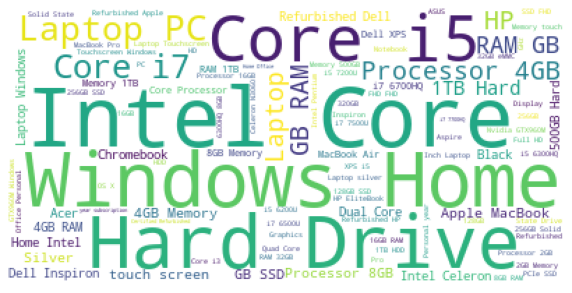

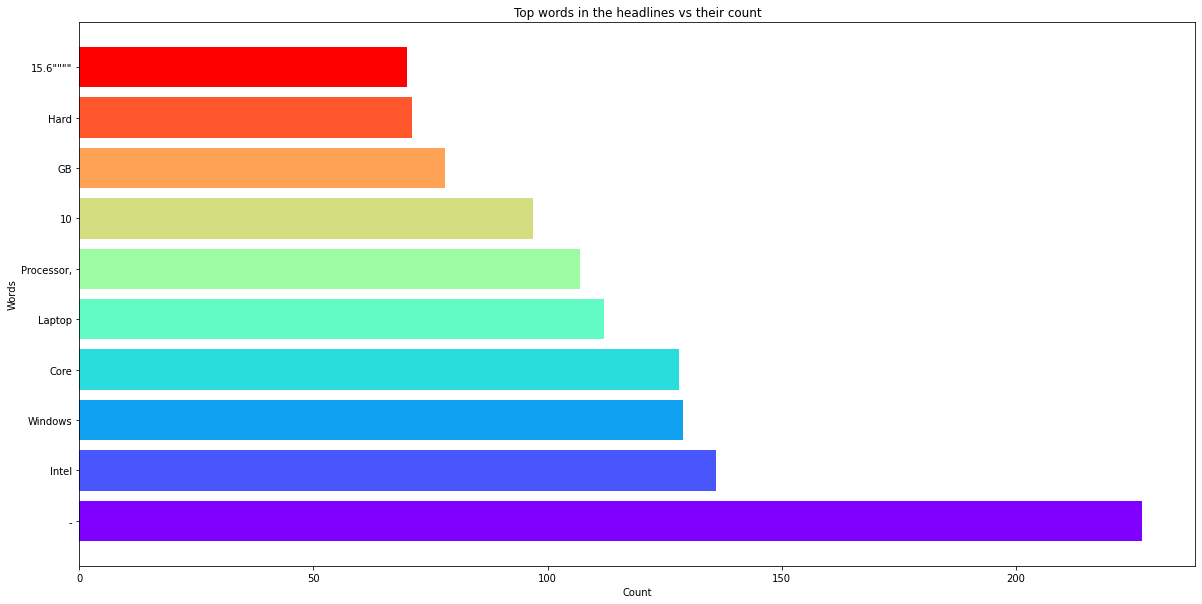

In [84]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(full_text)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
filtered_words = [word for word in full_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()